# How and what affects the review scores of airbnb most; location, value or hosts?

Sydney Airbnb Data Listing

Karen Stevani (z5573992)

In [18]:
import os
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import numpy as np
import plotly.graph_objects as go
from datetime import datetime

In [19]:
%matplotlib inline

In [20]:
plt.rcParams["figure.figsize"] = (30, 15)

In [21]:
saved_style_state = matplotlib.rcParams.copy()  # give us a style state to go back to

In [22]:
#loading from file
if os.path.isfile("sydney_airbnb_listing.csv"):
    filepath = "sydney_airbnb_listing.csv"
    print("loading from file")
else:
    filepath = "https://data.insideairbnb.com/australia/nsw/sydney/2024-03-16/data/listings.csv.gz"
    print("loading from the internet")

listing_data = pd.read_csv(filepath)
print("done")

loading from file
done


In [46]:
shp_file_name = r"gda2020 (1).zip"
zip_file_name = "nsw_locality_polygon_shp.zip"
web_file_path = (
    "https://data.gov.au/data/dataset"
    "91e70237-d9d1-4719-a82f-e71b811154c6/resource/"
    "5e295412-357c-49a2-98d5-6caf099c2339/dowload/"
    "nsw_locality_polygon_shp.zip"
)

In [48]:
def unzip_zipfile(zipped_file_path, put_it_here="."):
    import zipfile
    zip_of_suburbs = zipfile.zipfile(zipped_file_path, 'r')
    zip_of_suburbs.extractall(put_it_here)
    zip_of_suburbs.close()

In [49]:
if os.path.isfile(shp_file_name):
    print("loading from file")
else:
    if os.path.isfile(zip_file_name):
        print("unzipping")
        unzip_zipfile(zip_file_name)
    else:
        import requests
        print("loading from the internet")
        page = requests.get(web_file_path)
        with open(zip_file_name, "wb") as z:
            z.write(page.content)
        unzip_zipfile(zip_file_name)

print("done")

loading from file
done


Data Set: "Detailed Sydney Listings data" from insideairbnb.com

Published by: Inside Airbnb, licensed under a Creative Commons Attribution 4.0 International License, on 10 June 2024

This data explores ....

In [23]:
listing_data.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1050164598350388320,https://www.airbnb.com/rooms/1050164598350388320,20240316023820,2024-03-18,city scrape,Self service English breakfast,Close to transport airport older style unit ne...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,211218678,...,NaN,NaN,NaN,PID-STRA-61891,f,1,0,1,0,NaN
1,1096082243192434668,https://www.airbnb.com/rooms/1096082243192434668,20240316023820,2024-03-18,city scrape,Apartment in Rushcutters Bay,Full 2 bedroom apartment with balcony. Walking...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,26721338,...,NaN,NaN,NaN,Exempt,f,2,1,1,0,NaN
2,2167538,https://www.airbnb.com/rooms/2167538,20240316023820,2024-03-18,city scrape,"Modern Sydney home near beach,shops",**Availability extremely flexible**<br /><br /...,Queens Park is a safe and friendly neighbourho...,https://a0.muscache.com/pictures/29922910/2399...,11059668,...,5.00,5.00,4.00,NaN,f,1,1,0,0,0.01
3,790607305500629830,https://www.airbnb.com/rooms/790607305500629830,20240316023820,2024-03-18,city scrape,Luxury double room,Relax in this tranquil and stylish space.,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,202112801,...,4.77,4.68,4.68,PID-STRA-21723,f,30,5,25,0,2.13
4,641106357139201992,https://www.airbnb.com/rooms/641106357139201992,20240316023820,2024-03-18,city scrape,Chic Studio Apartment in Prime Bondi Location,Immerse yourself in the vibrant atmosphere of ...,Bondi is one of Australia’s most iconic suburb...,https://a0.muscache.com/pictures/prohost-api/H...,279001183,...,3.94,4.94,4.29,PID-STRA-36651,f,217,217,0,0,0.84


In [24]:
listing_data.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

This dataset provides information on 14274 rows and 75 columns

In [25]:
listing_data.price

0        $100.00
1        $250.00
2        $650.00
3         $84.00
4        $508.00
          ...   
14269     $88.00
14270    $143.00
14271    $120.00
14272    $180.00
14273    $123.00
Name: price, Length: 14274, dtype: object

In [26]:
listing_data.accommodates

0        2
1        4
2        5
3        1
4        2
        ..
14269    2
14270    2
14271    4
14272    2
14273    2
Name: accommodates, Length: 14274, dtype: int64

In [27]:
listing_data['price'] = listing_data['price'].replace({'\$': '', ',': ''}, regex=True)
listing_data['price'] = pd.to_numeric(listing_data['price'], errors='coerce').astype('Int64')  # Use 'Int64' to handle NaN values
listing_data['price'] = listing_data['price'].fillna(0).astype(int)

<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
C:\Users\karen\AppData\Local\Temp\ipykernel_6180\2283849491.py:1: SyntaxWarning: invalid escape sequence '\$'
  listing_data['price'] = listing_data['price'].replace({'\$': '', ',': ''}, regex=True)


In [28]:
listing_data['standard_price'] = listing_data['price'] / listing_data['accommodates']
listing_data.standard_price

0         50.0
1         62.5
2        130.0
3         84.0
4        254.0
         ...  
14269     44.0
14270     71.5
14271     30.0
14272     90.0
14273     61.5
Name: standard_price, Length: 14274, dtype: float64

In [29]:
lower_bound = 0
upper_bound = 100
filtered_price = listing_data[(listing_data['standard_price'] >= lower_bound) & (listing_data['standard_price'] <= upper_bound)]

In [14]:
average_price = listing_data['price'].mean()
print(f"The average price is: ${average_price}")

average_standard_price = listing_data['standard_price'].mean()
print(f"The average price per person is: ${average_standard_price}")

The average price is: $395.94689645509317
The average price per person is: $95.22062845427966


In [52]:
burbs = gpd.GeoDataFrame.read_file(shp_file_name)
burbs.set_crs(espg=5234, inplace=True, allow_override=True)
burbs.sample(2)

AttributeError: type object 'GeoDataFrame' has no attribute 'read_file'

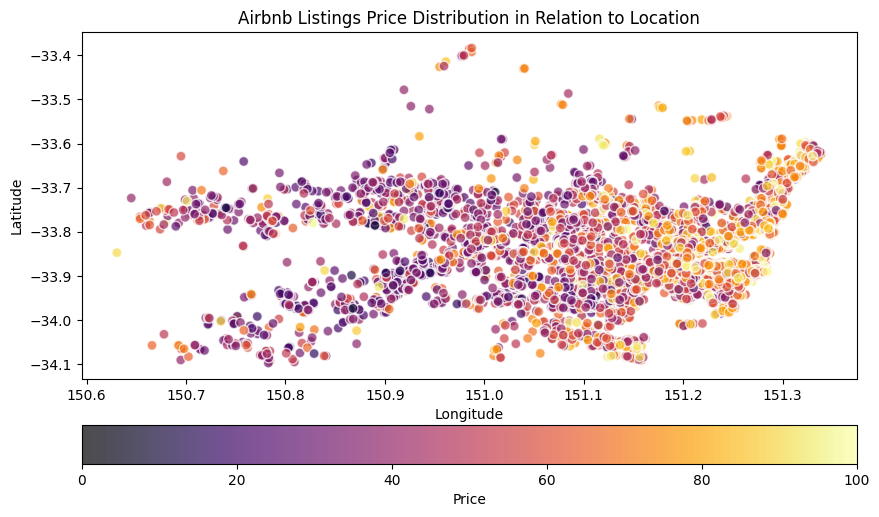

In [51]:
fig, ax = plt.subplots(figsize=(10, 6))

scatter = ax.scatter(
    filtered_price['longitude'], 
    filtered_price['latitude'], 
    c=filtered_price['standard_price'], 
    cmap='inferno', 
    s=50, 
    alpha=0.7, 
    edgecolors='w'
)

cbar = plt.colorbar(scatter, orientation='horizontal', pad=0.1, ax=ax)
cbar.set_label('Price')

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Airbnb Listings Price Distribution in Relation to Location')

plt.show()

In [57]:
listing_data.host_listings_count

0          1
1          2
2          1
3         31
4        900
        ... 
14269      5
14270      1
14271      1
14272     23
14273      1
Name: host_listings_count, Length: 14274, dtype: int64

In [83]:
listing_data.host_since

0       1970-01-01 00:00:00.020180822
1       1970-01-01 00:00:00.020150126
2       1970-01-01 00:00:00.020140106
3       1970-01-01 00:00:00.020180713
4       1970-01-01 00:00:00.020190724
                     ...             
14269   1970-01-01 00:00:00.020150223
14270   1970-01-01 00:00:00.020151221
14271   1970-01-01 00:00:00.020220703
14272   1970-01-01 00:00:00.020231007
14273   1970-01-01 00:00:00.020171008
Name: host_since, Length: 14274, dtype: datetime64[ns]

In [84]:
listing_data['host_since'] = pd.to_datetime(listing_data['host_since'])

In [85]:
reference_date = pd.Timestamp('2024-08-01')

In [77]:
listing_data['days_since_start'] = (pd.Timestamp.today() - listing_data['host_since']).dt.days

In [78]:
listing_data.days_since_start

0        19935
1        19935
2        19935
3        19935
4        19935
         ...  
14269    19935
14270    19935
14271    19935
14272    19935
14273    19935
Name: days_since_start, Length: 14274, dtype: int64

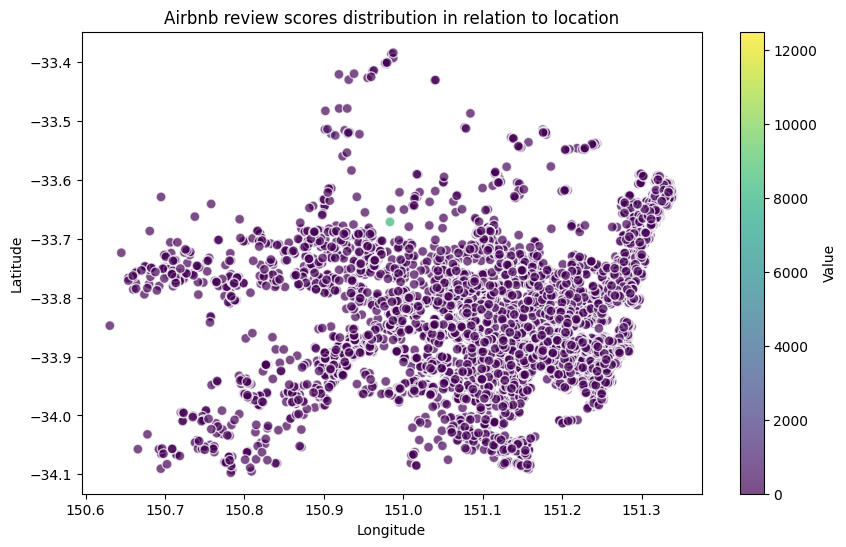

In [16]:
plt.figure(figsize=(10, 6))
plt.scatter(listing_data['longitude'], listing_data['latitude'], c=listing_data['standard_price'], cmap='viridis', s=50, alpha=0.7, edgecolors='w')

plt.colorbar(label='Value')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Airbnb review scores distribution in relation to location')

# Show the plot
plt.show()

In [17]:
plt.figure(figsize=(10, 6))
plt.scatter(listing_data['longitude'], listing_data['latitude'], c=listing_data['filtered'], cmap='viridis', s=50, alpha=0.7, edgecolors='w')

plt.colorbar(label='Value')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Airbnb review scores distribution in relation to location')

# Show the plot
plt.show()

KeyError: 'filtered'

<Figure size 1000x600 with 0 Axes>

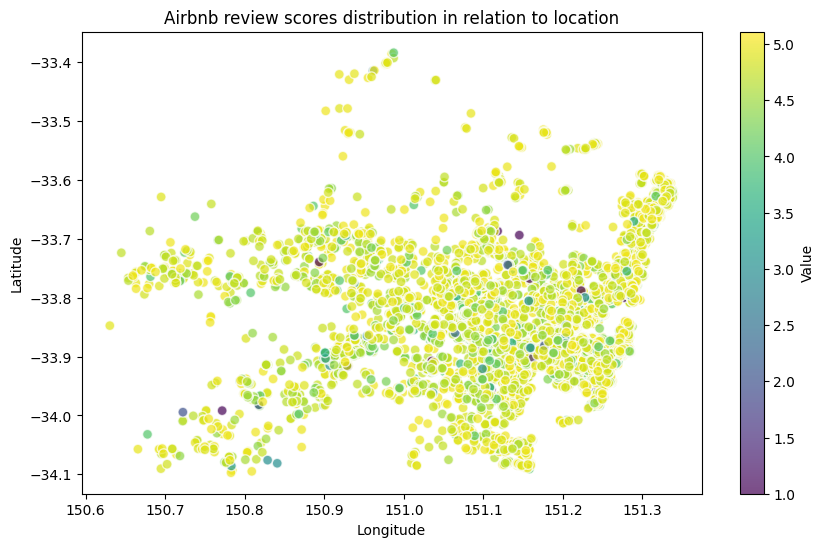

In [55]:
plt.figure(figsize=(10, 6))
plt.scatter(listing_data['longitude'], listing_data['latitude'], c=listing_data['review_scores_rating'], cmap='viridis', s=50, alpha=0.7, edgecolors='w')

plt.colorbar(label='Value')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Airbnb review scores distribution in relation to location')

# Show the plot
plt.show()